In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Punto 2

In [ ]:
def Newton(f, df, x_0, tol=1e-5):
  values = [x_0]
  x = x_0
  while(abs(f(x)) > tol):
    x = x - f(x)/df(x)
    values.append(x)
  return values

## Primer Iteración

In [ ]:
Newton(lambda x: 2*x**3-4*x+1, lambda x: 6*x**2-4, 3)

[3,
 2.14,
 1.6271414454629096,
 1.365694355160349,
 1.2778599445275443,
 1.2671896255688675,
 1.2670351305810066]

## Segunda Iteración

In [ ]:
Newton(lambda x: 2*x**2+2.53407026*x-0.78924396, lambda x: 4*x+2.53407026, 2)

[2,
 0.8343635217029586,
 0.3715506917520818,
 0.26499289623512784,
 0.2586743477733634,
 0.25865197363272613]

# Punto 5

## a)

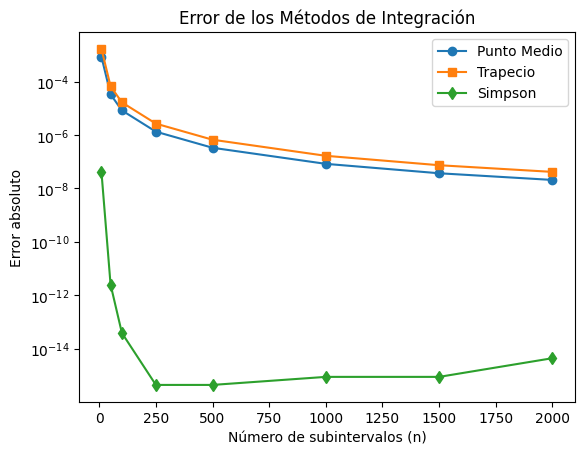

In [ ]:
def punto_medio(f, a, b, n):
  h = (b - a) / n
  suma = 0
  for i in range(n):
    x_medio = a + (i + 0.5) * h
    suma += f(x_medio)
  return h * suma

def trapecio(f, a, b, n):
  h = (b - a) / n
  suma = (f(a) + f(b)) / 2
  for i in range(1, n):
    x_i = a + i * h
    suma += f(x_i)
  return h * suma

# Simpson requiere un número par de subintervalos
def simpson(f, a, b, n):
  h = (b - a) / n
  suma = f(a) + f(b)
  for i in range(1, n, 2):
    suma += 4 * f(a + i * h)
  for i in range(2, n-1, 2):
    suma += 2 * f(a + i * h)
  return (h / 3) * suma

n_values = [10, 50, 100, 250, 500, 1000, 1500, 2000]
f = lambda x: 4/(1+x**2)

error_punto_medio = [abs(punto_medio(f, 0, 1, n) - np.pi) for n in n_values]
error_trapecio = [abs(trapecio(f, 0, 1, n) - np.pi) for n in n_values]
error_simpson = [abs(simpson(f, 0, 1, n) - np.pi) for n in n_values]

plt.plot(n_values, error_punto_medio, 'o-', label="Punto Medio")
plt.plot(n_values, error_trapecio, 's-', label="Trapecio")
plt.plot(n_values, error_simpson, 'd-', label="Simpson")
plt.yscale("log")
plt.xlabel("Número de subintervalos (n)")
plt.ylabel("Error absoluto")
plt.title("Error de los Métodos de Integración")
plt.legend()
plt.show()

## b)

[0.14159265358979312, 0.008259320256459812, 0.0005249934690301217, 6.869827919420146e-06, 1.1687923962000468e-08, 4.845057688385168e-11, 7.061018436615996e-14, 8.881784197001252e-16]


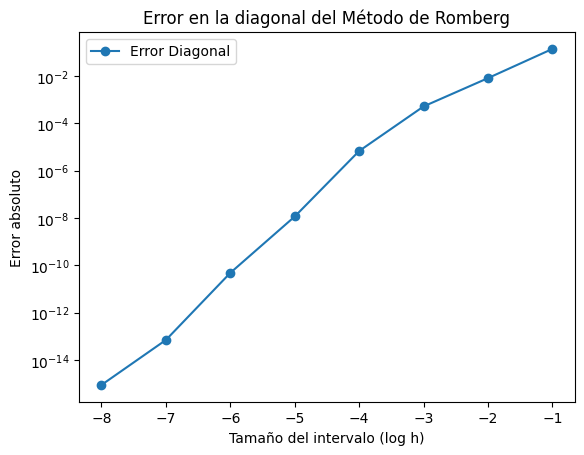

In [ ]:
def romberg(f, a, b, n):
  R = np.zeros((n, n))

  # Regla del trapecio en diferentes niveles
  for k in range(n):
    num_intervals = 2**k
    h = (b - a) / num_intervals
    sum_f = sum(f(a + j * h) for j in range(1, num_intervals, 2))
    R[k, 0] = 0.5 * R[k-1, 0] + h * sum_f if k > 0 else h * (f(a) + f(b)) / 2

  # Extrapolación de Richardson
  for m in range(1, n):
    for k in range(m, n):
      R[k, m] = R[k, m-1] + (R[k, m-1] - R[k-1, m-1]) / (4**m - 1)

  return R

n = 8
f = lambda x: 4/(1+x**2)
R = romberg(f, 0, 1, n)

error_diagonal = [abs(np.pi-R[i][i]) for i in range(n)]
print(error_diagonal)
plt.plot([-i for i in range(1,n+1)], error_diagonal, 'o-', label="Error Diagonal")
plt.yscale("log")
plt.xlabel("Tamaño del intervalo (log h)")
plt.ylabel("Error absoluto")
plt.title("Error en la diagonal del Método de Romberg")
plt.legend()
plt.show()